# <center>KIỂM ĐỊNH ANOVA</center>

**ANOVA (Analysis of Variance)** có thể xem như là t-test mở rộng, nó được dùng để kiểm tra trung bình của nhiều hơn 2 nhóm có bằng nhau không?

$ H_0: \mu_1 = \mu_2 = ... = \mu_k $  
$ H_1: $ Các $\mu$ không bằng nhau  
k là số nhóm

# Điều kiện:
1. Normality: các nhóm phải có phân bố normal.
2. Homogeneity: các nhóm phải có variance như nhau.
3. Các nhóm phải độc lập với nhau

Khi các điều kiện trên không thoả, thì ta dùng **Kruskal-Wallis H-test or Welch’s ANOVA.**

Kết quả của ANOVA là dựa trên f distribution với 2 độ tự do df1=k-1, df2=n-k.

# Công thức của ANOVA là dựa trên mô hình linear regresion.

f-statistics $ = \frac{\text{(TSS-RSS)/df1}}{\text{RSS/df2}} $  
Trong đó:  
- TSS: total sum of square = $ \sum (y-\overline{y})^2 $
- RSS: residual sum of square = $ \sum (y-\hat{y})^2 $
- df1, df2: độ tự do của phân phối f, df1=k-1, df2=n-k
- n là số data, k là số nhóm

# Effect size: eta-square với omega-square để ước tính hiệu quả của model với thực tế
eta-squared tương đương với $R^2$ trong linear regression, tức là giải thích variance của model so với variance của data.

$\eta^2 = R^2 = \frac{\text{TSS - RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$

Omega-squared là chỉ số tốt hơn eta-square vì nó không bias, đặc biệt là với cỡ mẫu nhỏ

<font size="+1">$ \omega^2 = \frac{\text{(TSS - RSS)} - \frac{\text{df1}}{\text{df2}} RSS   }{ \text{TSS} + \frac{1}{\text{df2}}\text{RSS} }$ </font>

Diễn giải omega-squared:
- giá trị từ -1 -> +1
- khi f-stat < 1 thì omega-squared âm
- khi omega-squared = 0 thì model không giải thích được data

# Kiểm tra điều kiện ANOVA bằng tests
Khi tính ANOVA thông qua linear regression thì các điều kiện lên data được áp dụng trên residual

1. Levene's test để kiểm tra *homogeneity of variance*
2. Shapiro's test để kiểm tra *normality*

# Post-hoc test
Kết quả anova cho phép ta nói biến số có hoặc không có liên quan outcome.  Nó không so sánh được giữa 2 nhóm trong đó với nhau. Do đó, ta cần post-hoc test.  

1. Bonferroni Correction Post-hoc Comparison  
Với f-stats, ta đặt mức có ý nghĩa là $\alpha$ là 0.05. Khi dùng Bonferroni, thì ta lấy $\alpha$ chia cho số lần so sánh là ra mức có ý nghĩa của t-test từng cặp nhóm.  
Sau đó, mình có thể tính effect size dựa vào t-stat. Effect size dùng để mổ tả liên kết giữa các nhóm. Effect size càng lớn thì sự khác nhau càng rõ.  
Effect size r $ = \frac{t^2}{t^2 + \text{dof}} $; dof = data length - number of groups.
2. Tukey’s HSD Post-hoc comparison  
Tương tự như Bonferroni, tukey kiểm soát alpha chung của ANOVA = 0.05 bằng phương pháp khác, sau đó tính t-test sự khác nhau của từng cặp nhóm. Tuy nhiên do không có tính t-stat nên không tính effect size được

---
# Ví dụ từ https://pythonfordatascience.org/anova-python/

This is made up data that is measuring the effects of different doses of a clinical drug, Difficile, on libido. It contains 2 columns of interest, “dose” and “libido”. Dose contains information on the dosing, “placebo”, “low”, and “high”, and libido is a measure of low-high libido on a 7 point Likert scale with 7 being the highest and 1 being the lowest. 

In [1]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import researchpy as rp

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/difficile.csv")
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

df.head()

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4


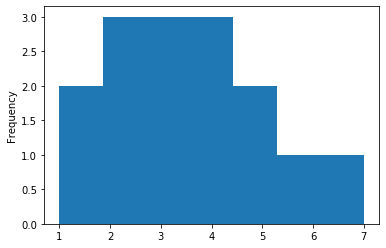

In [3]:
df['libido'].plot(kind='hist',bins=7);

In [4]:
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.466667,1.76743,0.456349,2.487896,4.445437


In [5]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.581139,0.707107,3.450484,6.549516
low,5,3.2,1.303840,0.583095,1.922236,4.477764
placebo,5,2.2,1.303840,0.583095,0.922236,3.477764


In [6]:
results = ols('libido ~ C(dose)', data=df).fit()
results.summary()

/Volumes/DATA/anaconda3/envs/jupyter/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Sat, 15 Feb 2020   Prob (F-statistic):             0.0247
Time:                        10:57:45   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0000      0.627      7.972      0.000       3.634       6.366
C(dose)[T.low]        -1.8000      0.887     -2.029      0.065      -3.732       0.132
C(dose)[T.placebo]    -2.8000      0.887     -3.157      0.008      -4.732      -0.868
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
Lưu ý Intercept trong model là high dose.  
f-stat = 5.119, p-value = 0.0247 < 0.05  
=> reject $H_0$ => có sự khác nhau có ý nghĩa thống kê giữa dose của thuốc Difficile lên libido

In [7]:
aov_table = sm.stats.anova_lm(results, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(dose),2.0,20.133333,10.066667,5.118644,0.024694
Residual,12.0,23.600000,1.966667,NaN,NaN


In [8]:
RSS = aov_table['sum_sq']['Residual']
TSS = sum(aov_table['sum_sq'])

In [9]:
def eta_squared(RSS,TSS):
    return 1 - RSS/TSS

eta_squared(RSS,TSS)
# tương đương R square trong ket quả linear regression

0.46036585365853644

In [10]:
def omega_squared(RSS,TSS,df1,df2):
    return (TSS-RSS-df1/df2*RSS)/(TSS+RSS/df2)

omega_squared(RSS,TSS,2,12)

0.3544857768052514

In [11]:
# Kiểm tra điều kiện
results.summary().tables[2]

Omnibus:,2.517,Durbin-Watson:,2.408
Prob(Omnibus):,0.284,Jarque-Bera (JB):,1.108
Skew:,0.195,Prob(JB):,0.575
Kurtosis:,1.727,Cond. No.,3.73


- Durbin-Watson  
Dùng để đánh giá autocorrelation: là correlation giữa outcome tại variable [x] so với outcome tại variable[x-1], thường dùng trong timeseries.  
Giá trị từ 0 -> 4  
Giá trị =2: không có autocorrelation.  
Giá trị <2: autocorrelation (+): outcome có chiều hướng tăng  
Giá trị >2: autocorrelation (-): outcome có chiều hương giảm  

- Jarque-Bera    
Kiểm tra normality dựa trên skewness và kurtosis.  
$H_0$: data có phân phối giống normal
Giá trị luôn >0.    
Giá trị càng xa số 0 thì càng khác phân phối normal.  
Sample size càng nhỏ thì càng không chính xác.  
P-value < 0.05 thì reject $H_0$.  
Hoặc có thể dùng shapiro's test.

- Omnibus  
Kiểm tra homogeneity of variance  
$H_0$: variance của các nhóm như nhau  
Có thể dùng levene's test

In [12]:
st.shapiro(results.resid)

(0.916691780090332, 0.1714704930782318)

In [13]:
st.levene(df['libido'][df['dose'] == 'placebo'],
          df['libido'][df['dose'] == 'low'],
          df['libido'][df['dose'] == 'high'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

In [14]:
# post-hoc test

# Bonferroni
alpha = 0.05/3 # 0.017

(
st.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'low']),
st.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'placebo']),
st.ttest_ind(df['libido'][df['dose'] == 'placebo'], df['libido'][df['dose'] == 'low'])
)

# chỉ có ttest giữa hige dose với placebo mới có khác biệt có ý nghĩa thống kê.
# tức là libido của nhóm high dose difficile khác libido của placebo

(Ttest_indResult(statistic=1.963961012123931, pvalue=0.08513507177899203),
 Ttest_indResult(statistic=3.0550504633038926, pvalue=0.015700141250047695),
 Ttest_indResult(statistic=-1.2126781251816647, pvalue=0.2598450452137845))

In [15]:
# effect size r = square root of (t2/t2 + dof)
# dof = data.count() - no. of groups

# effect size giữa high dose và placebo
np.sqrt(1.213**2/(1.213**2 + 8))

# => 0.39 => medium effect size

0.39414354867502716